## Loading Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

## Loading Iris Dataset

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

## Split the dataset into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2]
class representation [0 0 1 0 0 2 1 0 0 0]
shape of X_train: (120, 4), shape of y_train: (120,)


## Define the model

In [6]:
model = Sequential([
    Dense(25, activation='relu', input_shape=(4,)),
    Dense(15, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for Iris
])

c:\Users\ela\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

## Train the model

In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9765 - loss: 0.1759 - val_accuracy: 0.9667 - val_loss: 0.1791
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9671 - loss: 0.1829 - val_accuracy: 0.9667 - val_loss: 0.1778
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9733 - loss: 0.1643 - val_accuracy: 0.9667 - val_loss: 0.1774
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9860 - loss: 0.1549 - val_accuracy: 0.9667 - val_loss: 0.1734
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9827 - loss: 0.1578 - val_accuracy: 0.9667 - val_loss: 0.1713
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9765 - loss: 0.1628 - val_accuracy: 0.9667 - val_loss: 0.1709
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9881 - loss: 0.1523 - val_accuracy: 0.9667 - val_loss: 0.1691
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9712 - loss: 0.1461 - val_accuracy: 0.9667 - val_loss:

## Evaluate the model

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Accuracy: 0.97


## Print the classification report

In [10]:
print(classification_report(y_test, y_pred_classes, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## Plot training loss and accuracy

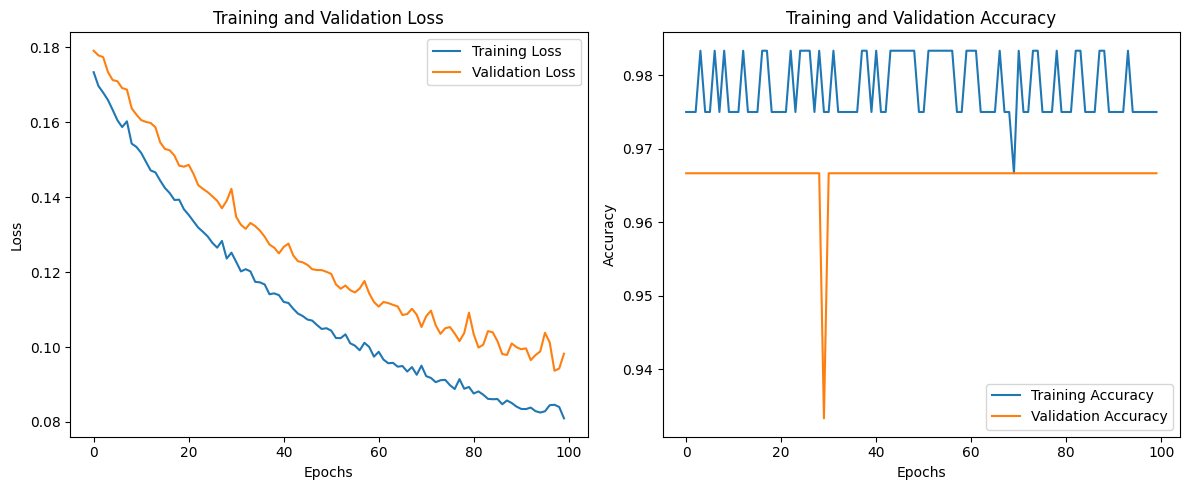

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Make predictions for new samples

In [14]:
new_samples = np.array([[5.1, 3.5, 1.4, 0.2],n                        [6.2, 2.9, 4.3, 1.3],
                        [7.7, 3.0, 6.1, 2.3]])
predictions = model.predict(new_samples)
predicted_classes = np.argmax(predictions, axis=1)

species_names = ['Setosa', 'Versicolor', 'Virginica']
predicted_species = [species_names[i] for i in predicted_classes]

print("Predicted species for new samples:")
for sample, species in zip(new_samples, predicted_species):
    print(f"Sample: {sample} -> Predicted species: {species}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted species for new samples:
Sample: [5.1 3.5 1.4 0.2] -> Predicted species: Setosa
Sample: [6.2 2.9 4.3 1.3] -> Predicted species: Versicolor
Sample: [7.7 3.  6.1 2.3] -> Predicted species: Virginica
